## Plot bifurcation diagram for truncated contagion maps in dependence of the noisiness and the treshold T

In [1]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd

# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap

sns.set_style("white")

from sklearn.decomposition import PCA


### Network construction and computation of the contagion maps

In [2]:
%%time

N=400
maxDegree=40

#alpha_vec = np.arange(0,1.1,0.05)
threshold_vec = np.arange(0,0.7,0.05)
s_vec = [20,40,np.Inf]
nongeometricDegree_vec =np.arange(0,maxDegree,dtype=int)


ringStabilityOut = []
thresholdOut=[]
nStepOut=[]
alphaOut=[]

for nongeometricDegree in nongeometricDegree_vec:
    
    # construct network
    #geometricDegree = round(degree/(alpha+1))
    #nongeometricDegree = degree-geometricDegree
    #geometricDegree = maxDegree - nongeometricDegree
    geometricDegree = maxDegree
    alpha = nongeometricDegree/geometricDegree
    print(geometricDegree,nongeometricDegree)
    print(alpha)
    noisyRL = conmap.constructNoisyRingLattice(numberNodes=400,geometricDegree=geometricDegree,nongeometricDegree=nongeometricDegree)
    print('network constructed')
    for t in threshold_vec:
        for s in s_vec:
            # run contagion map
            contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=s,symmetric=True)
            # compute ring stability
            ringStability = conmap.callRipser(contagionMap)

            # save
            thresholdOut.append(t)
            nStepOut.append(s)
            alphaOut.append(alpha)

            ringStabilityOut.append(ringStability)

# save output DF
contagionMapPerformace = pd.DataFrame()
contagionMapPerformace['threshold'] = thresholdOut
contagionMapPerformace['number steps'] = nStepOut
contagionMapPerformace['noisness'] = alphaOut
#contagionMapPerformace['spearman correlation'] = correlationOut
contagionMapPerformace['ring stability'] = ringStabilityOut



40 0
0.0
network constructed
40 1
0.025
network constructed
40 2
0.05
network constructed
40 3
0.075
network constructed
40 4
0.1
network constructed
40 5
0.125
network constructed
40 6
0.15
network constructed
40 7
0.175
network constructed
40 8
0.2
network constructed
40 9
0.225
network constructed
40 10
0.25
network constructed
40 11
0.275
network constructed
40 12
0.3
failed adding of non-geometric edges: restart
network constructed
40 13
0.325
network constructed
40 14
0.35
network constructed
40 15
0.375
failed adding of non-geometric edges: restart
failed adding of non-geometric edges: restart
network constructed
40 16
0.4
network constructed
40 17
0.425
network constructed
40 18
0.45
network constructed
40 19
0.475
network constructed
40 20
0.5
network constructed
40 21
0.525
network constructed
40 22
0.55
network constructed
40 23
0.575
network constructed
40 24
0.6
network constructed
40 25
0.625
failed adding of non-geometric edges: restart
network constructed
40 26
0.65
net

### Visualisation

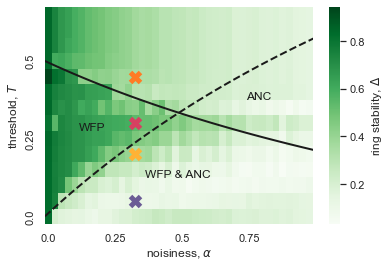

In [3]:
RingStabilityPivoted_s20 = contagionMapPerformace[contagionMapPerformace['number steps'] == 20].pivot_table('ring stability','threshold','noisness')
ax = sns.heatmap(RingStabilityPivoted_s20,yticklabels=5,xticklabels=10,cbar_kws={'label': r'ring stability, $\Delta$'}, cmap="Greens")
ax.invert_yaxis()
plt.xlabel(r'noisiness, $\alpha$')
plt.ylabel(r'threshold, $T$')

# add the theory lines
sizeMatrix = RingStabilityPivoted_s20.shape
alphaTheory=np.arange(0,1,0.01)
T_ANC = alphaTheory/(alphaTheory+1)
T_WFP = (1/2)*(1/(alphaTheory+1))

plt.plot(T_ANC*sizeMatrix[1]+0.5, color='k', linestyle='--', linewidth='2')
plt.plot(T_WFP*sizeMatrix[1]+0.5-10, color='k', linestyle='-', linewidth='2')


plt.text(x=5,y=6,s='WFP',color='k')

plt.text(x=30,y=8,s='ANC',color='k')

plt.text(x=15,y=3,s='WFP & ANC',color='k')


# add points at locations
plt.scatter(13+0.5,0.05*sizeMatrix[1]-0.5,color='#6b5b95',s=100,marker='x',linewidth=5)
plt.scatter(13+0.5,0.2*sizeMatrix[1]-3.5,color='#feb236',s=100,marker='x',linewidth=5)
plt.scatter(13+0.5,0.3*sizeMatrix[1]-5.5,color='#d64161',s=100,marker='x',linewidth=5)
plt.scatter(13+0.5,0.45*sizeMatrix[1]-8.5,color='#ff7b25',s=100,marker='x',linewidth=5)


# plt.plot(alphaTheory*sizeMatrix[0],T_ANC*sizeMatrix[1], color='w', linestyle='--')
# plt.plot(alphaTheory*sizeMatrix[0],T_WFP*sizeMatrix[1], color='w', linestyle='-')

#plt.savefig('./figures/matrixPlot_steps20.pdf')
